<a href="https://colab.research.google.com/github/TedMwenda/dsc-phase-1-project-v3/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AVIATION DATASET ANALYSIS**


---



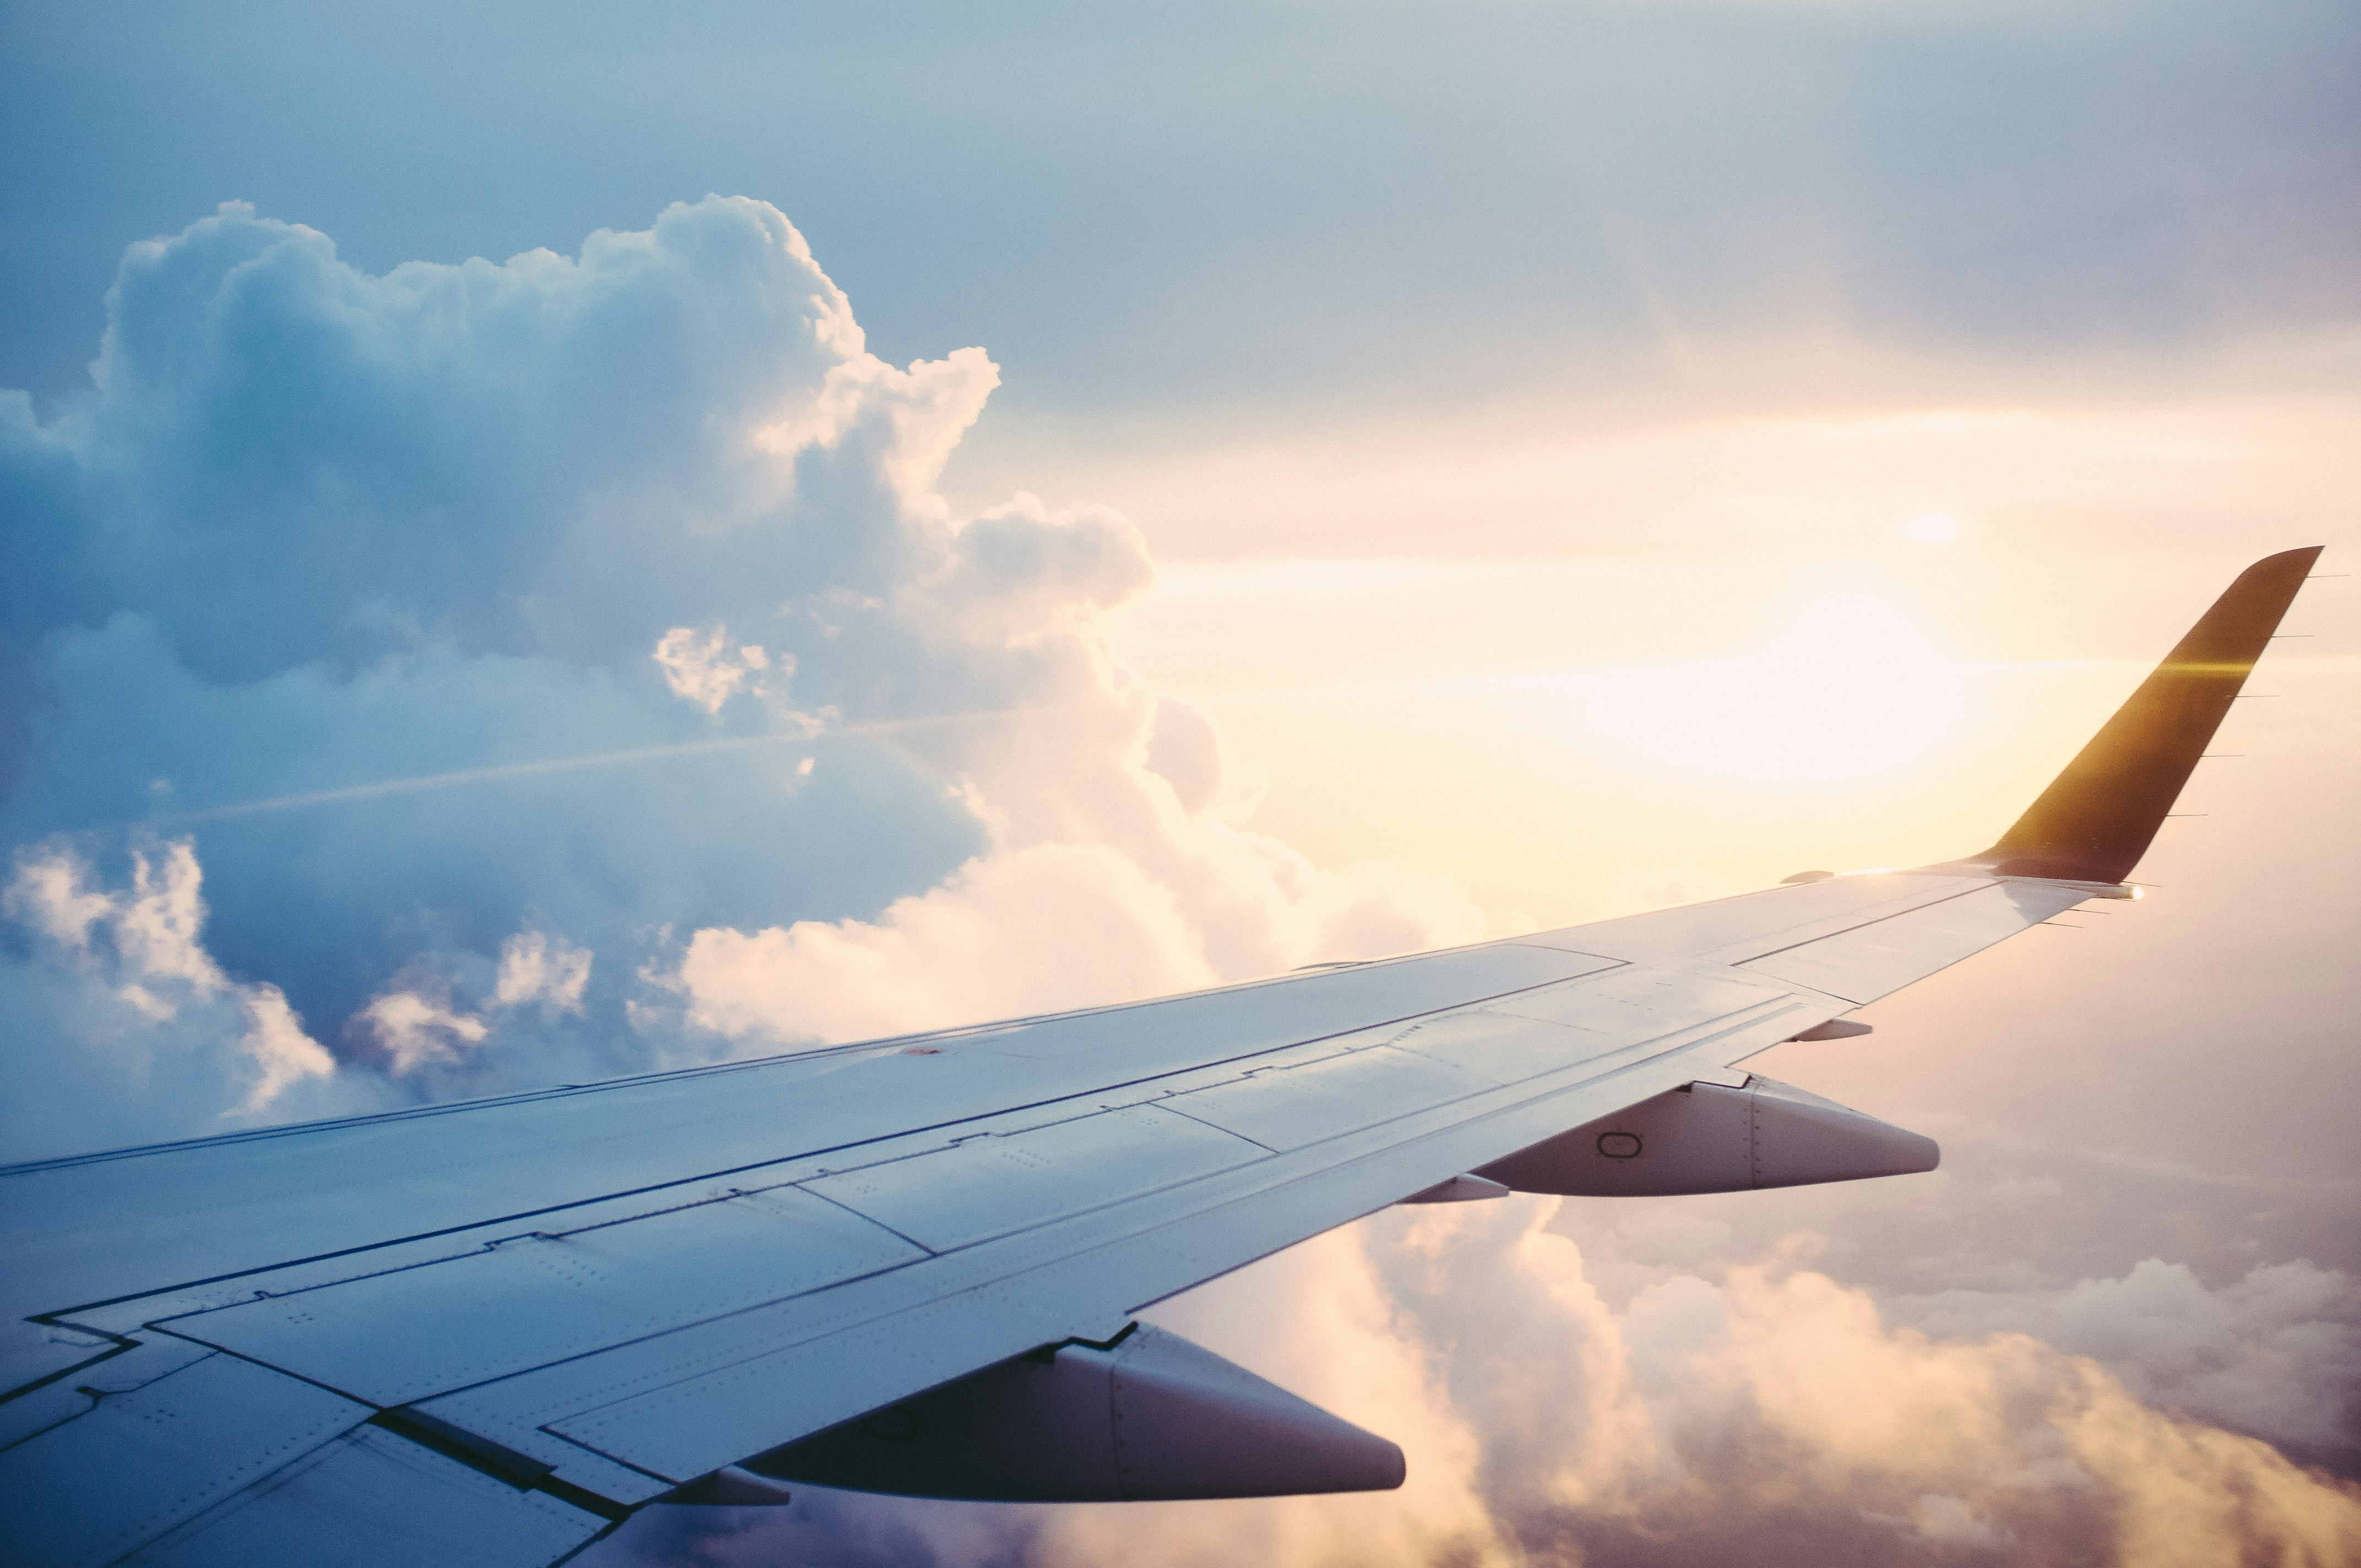

#BUSINESS PROBLEM

---



The company plans to diversify into aviation by acquiring aircraft for commercial and private operations. However, it lacks insight into the risks associated with different aircraft types. This analysis uses aviation accident data to identify lower-risk aircraft and provide actionable recommendations to guide aircraft acquisition decisions.

#IMPORTING NECESSARY LIBRARIES

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING DATASET

---



In [4]:
# Loading data
df=pd.read_csv('Aviation_Data.csv')
df.head()

/tmp/ipython-input-4252487649.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Aviation_Data.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


# DATA UNDERSTANDING

---



In [5]:
# Checking data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# checking rows and columns
df.shape

(90348, 31)

From the functions ran we can see that the data set has 90348 rows and 31 columns. The schedule and Air.carrier columns have the largest number of missing values.

In [7]:
# Checking the statistical summary
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


# INSIGHTS DERIVED FROM THE ABOVE TABLE

---


- The dataset is large (80,000+ accident records), providing a strong
basis for aviation risk analysis.

- Single-engine aircraft dominate the data (median = 1 engine), making them central to overall risk patterns.

- Most accidents result in no fatalities or serious injuries, indicating generally survivable incidents.

- Injury data is highly skewed, with rare but catastrophic accidents driving extreme outcomes.

- High variability in injury counts highlights the need to compare aircraft risk profiles, not rely on averages.

##**CORE CLEANING AND FEATURE ENGINEERING**

In [9]:
#I created a working copy and engineered some safety related fields
# Work on a copy to keep original intact if needed
aviation = df.copy()

# 1) Parse Event.Date into a proper datetime column
aviation['Event.Date']=pd.to_datetime(aviation['Event.Date'],errors='coerce')

# 2) Standardize Make and Model for grouping (uppercase, trimmed text)
for col in ['Make', 'Model']:
    aviation[col] = aviation[col].astype(str).str.strip().str.upper()

# 3) Convert injury columns to numeric, then create a Total.Injuries column
injury_cols=['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']
aviation[injury_cols]=aviation[injury_cols].apply(pd.to_numeric, errors='coerce')

aviation['Total.Injuries'] =aviation[injury_cols].sum(axis=1, min_count=1)

# 4) Create a simple flag: any injury vs no injury
aviation['Any.Injury'] =np.where(aviation['Total.Injuries'].fillna(0) > 0, 1, 0)

print(aviation[['Event.Date','Make','Model','Total.Injuries','Any.Injury']].head())

  Event.Date      Make     Model  Total.Injuries  Any.Injury
0 1948-10-24   STINSON     108-3             2.0           1
1 1962-07-19     PIPER  PA24-180             4.0           1
2 1974-08-30    CESSNA      172M             3.0           1
3 1977-06-19  ROCKWELL       112             2.0           1
4 1979-08-02    CESSNA       501             3.0           1


In [10]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')

/tmp/ipython-input-1833200182.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')


In [11]:
#Quantifying aircraft risk with pandas
# Define the group keys
group_cols = ['Make', 'Model']

# Group and aggregate risk metrics at aircraft-type level
#how many recorded events for this type
#how many of those events had any injury
#total number of injuries across all events
agg_df = (
    aviation
    .groupby(group_cols)
    .agg(
        Events=('Event.Id', 'count'),
        Injury_Events=('Any.Injury', 'sum'),
        Total_Injuries=('Total.Injuries', 'sum')
    )
    .reset_index()
)

# Compute the injury rate: proportion of events with any injury
agg_df['Injury.Rate'] = agg_df['Injury_Events'] / agg_df['Events']

# Filter out very rare aircraft types (small sample size can be misleading)
min_events = 30
filtered_agg = agg_df[agg_df['Events'] >= min_events].copy()

print(filtered_agg.head())

               Make Model  Events  Injury_Events  Total_Injuries  Injury.Rate
91   AERO COMMANDER   100      41             22            33.0     0.536585
179  AERO COMMANDER   S2R      72             21            21.0     0.291667
239         AERONCA  11AC      81             33            56.0     0.407407
244         AERONCA  15AC      35             10            13.0     0.285714
267         AERONCA   7AC     271            128           205.0     0.472325


##DATA VISUALIZATIONS

---



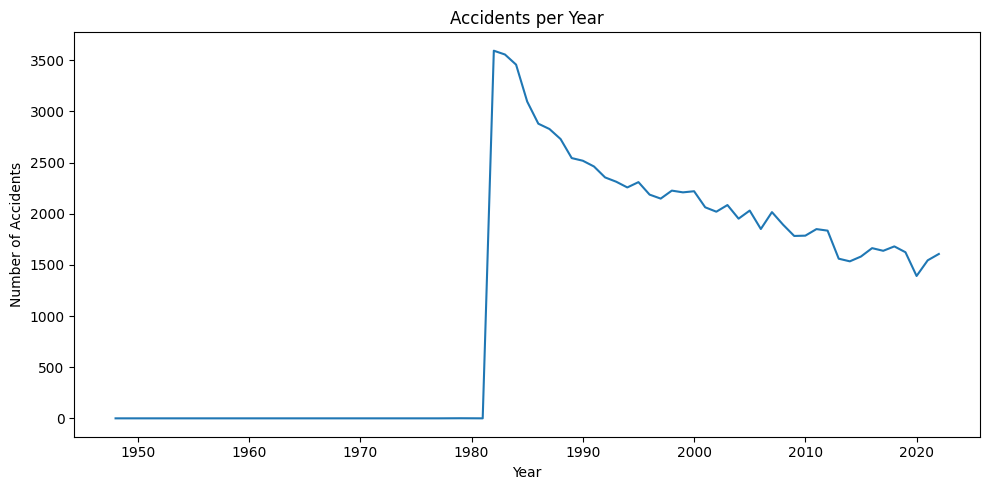

In [12]:
# 1) Accidents per year (time series)
aviation['Year'] = aviation['Event.Date'].dt.year
accidents_per_year = (
    aviation
    .dropna(subset=['Year'])
    .groupby('Year')['Event.Id']
    .count()
    .reset_index(name='Accident.Count')
)

plt.figure(figsize=(10, 5))
accidents_per_year_sorted = accidents_per_year.sort_values('Year')
sns.lineplot(data=accidents_per_year_sorted, x='Year', y='Accident.Count')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

From the early 1980s onward, accidents show a strong downward trend (55–60% reduction), suggesting sustained improvements such as better safety measures or regulations.

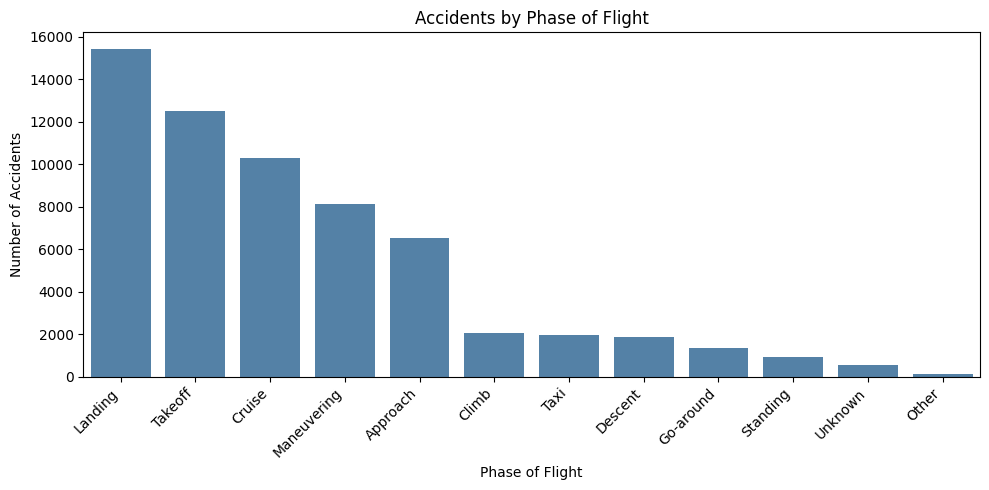

In [13]:
# 2) Bar chart: accidents by phase of flight
phase_counts = aviation['Broad.phase.of.flight'].value_counts().reset_index()
phase_counts.columns = ['Broad.phase.of.flight', 'Accident.Count']

plt.figure(figsize=(10, 5))
sns.barplot(data=phase_counts, x='Broad.phase.of.flight', y='Accident.Count', color='steelblue')
plt.title('Accidents by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The landing, takeoff, cruise, maneuvering and approach phases are associated with the highest number of accidents with the rest of the phases have significantly lower numers of accidents.

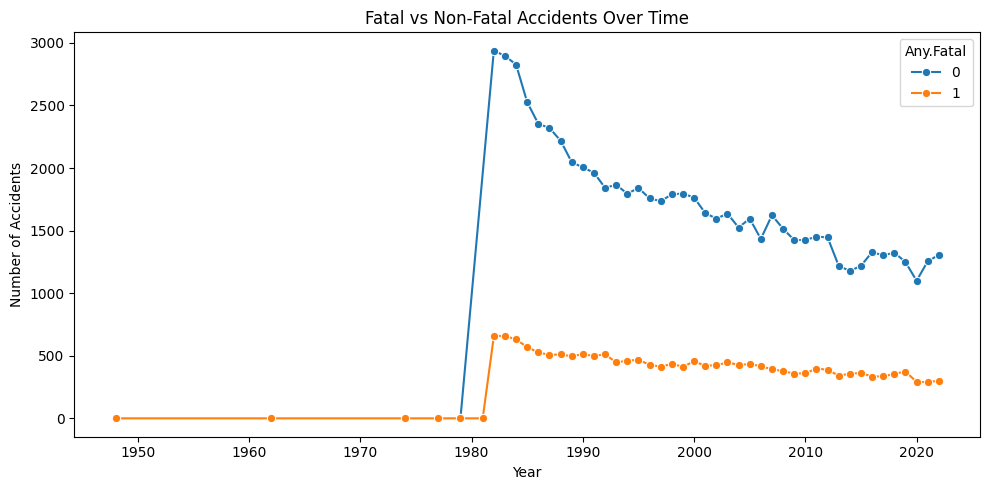

In [14]:
# 3) Line chart: fatal vs non-fatal accidents over time (by year)
aviation['Any.Fatal'] = np.where(aviation['Total.Fatal.Injuries'].fillna(0) > 0, 1, 0)
fatal_time = aviation.groupby(['Year', 'Any.Fatal'])['Event.Id'].count().reset_index(name='Accident.Count')

plt.figure(figsize=(10, 5))
sns.lineplot(data=fatal_time, x='Year', y='Accident.Count', hue='Any.Fatal', marker='o')
plt.title('Fatal vs Non-Fatal Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

Both fatal and non-fatal accidents have reduced over time since the 1980s. This may be as a result of decades of improved aerospace and safety technology.

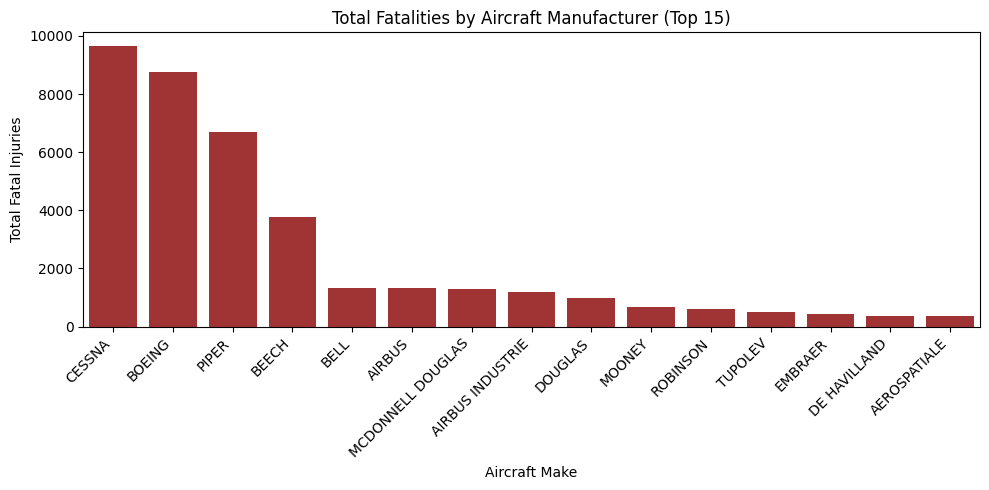

In [15]:
# 3) Bar chart: total fatalities by aircraft manufacturer (top 15)
fatal_by_make = aviation.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()
fatal_by_make = fatal_by_make.dropna(subset=['Make'])

fatal_by_make_top = fatal_by_make.sort_values('Total.Fatal.Injuries', ascending=False).head(15)

plt.figure(figsize=(10, 5))
sns.barplot(data=fatal_by_make_top, x='Make', y='Total.Fatal.Injuries', color='firebrick')
plt.title('Total Fatalities by Aircraft Manufacturer (Top 15)')
plt.xlabel('Aircraft Make')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see that majority of aircraft accident fatalities are by 4 major manufacturers i.e Cessna,Boeing,Piper,Beech. The other manufacturers share sparingly low total fatalities. It is recommended that this is used as a screening tool and not a verdict as the makes with larger fatalities may also be larger aircraft manufacturers meaning they simply have larger fleets and longer histories.

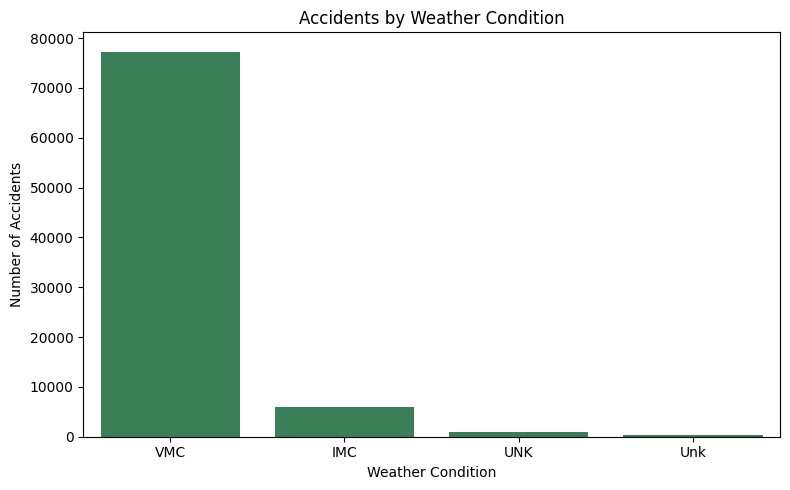

In [16]:
# 4) Bar chart: accidents by weather conditions
weather_counts = aviation['Weather.Condition'].value_counts().reset_index()
weather_counts.columns = ['Weather.Condition', 'Accident.Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=weather_counts, x='Weather.Condition', y='Accident.Count', color='seagreen')
plt.title('Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.tight_layout()
plt.show()

It is observed there is a significantly higher number of accidents in VMC(visual conditions) compared to other weather conditions.

## RECOMMENDATIONS

---



Based on the analysis we have done and the findings derived, we can come up with the following recommendations to solve our buisness problem:
- When buying aircraft, you should match the aircraft's design strengths to your operational profile/requirements e.g commercial use, private use, long-range, short range flights. Also prioritize aircraft with strong safety records in landing,approach,takeoff,cruise and maneuvering phases based on the accidents by phase of flight chart.
-  Based on the accidents by weather bar chart if your business relies on regular IFR/marginal weather operations prefer models with strong track records in airline/commuter/charter IFR use, not just VFR general aviation. If your business is mainly day-VFR sightseeing or short hops you can prioritize simple, rugged, easy‑to‑fly airframes.
- Based on the fatalities by manufacturers chart, in procurement of aircraft, you should prioritise manufacturers that don’t top the fatalities-by-make chart once you adjust intuitively for popularity and mission.
- Maintain a proper fleet maintenance and upgrading in order to maintain the fleet's capability and safety standards. Couple this with a good data collection pipeline and strategy continously moving your fleet towards a data driven safety standard rather than subjective impressions or marketing promises.  
- Based on all the analysis and metrics considered the lowest risk aircraft for the company to start the new business with; Boeing 747, Boeing 737-800, Boeing 757, Boeing 777 and Piper PA-18-160.